Dataset preview
   Unnamed: 0  sensor_0  sensor_1  sensor_2  sensor_3  sensor_4  sensor_5  \
0           0       1.0       2.0       1.0       7.0       0.0       1.0   
1           1       5.0       1.0       3.0       5.0       2.0       2.0   
2           2       3.0       1.0       4.0       3.0       4.0       0.0   
3           3       2.0       2.0       4.0       3.0       5.0       0.0   
4           4       4.0       3.0       3.0       2.0       5.0       1.0   

   sensor_6  sensor_7  sensor_8  ...  sensor_13  sensor_14  sensor_15  \
0       1.0       4.0       0.0  ...        8.0        1.0        0.0   
1       1.0       2.0       3.0  ...        4.0        5.0        5.0   
2       1.0       6.0       0.0  ...        3.0        3.0        1.0   
3       3.0       2.0       2.0  ...        4.0        1.0        1.0   
4       3.0       1.0       1.0  ...        1.0        3.0        2.0   

   sensor_16  sensor_17  sensor_18  sensor_19  parcel_0  parcel_1  parcel_2  
0   

C:\Users\Srinivas P M\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Srinivas P M\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Srinivas P M\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{me

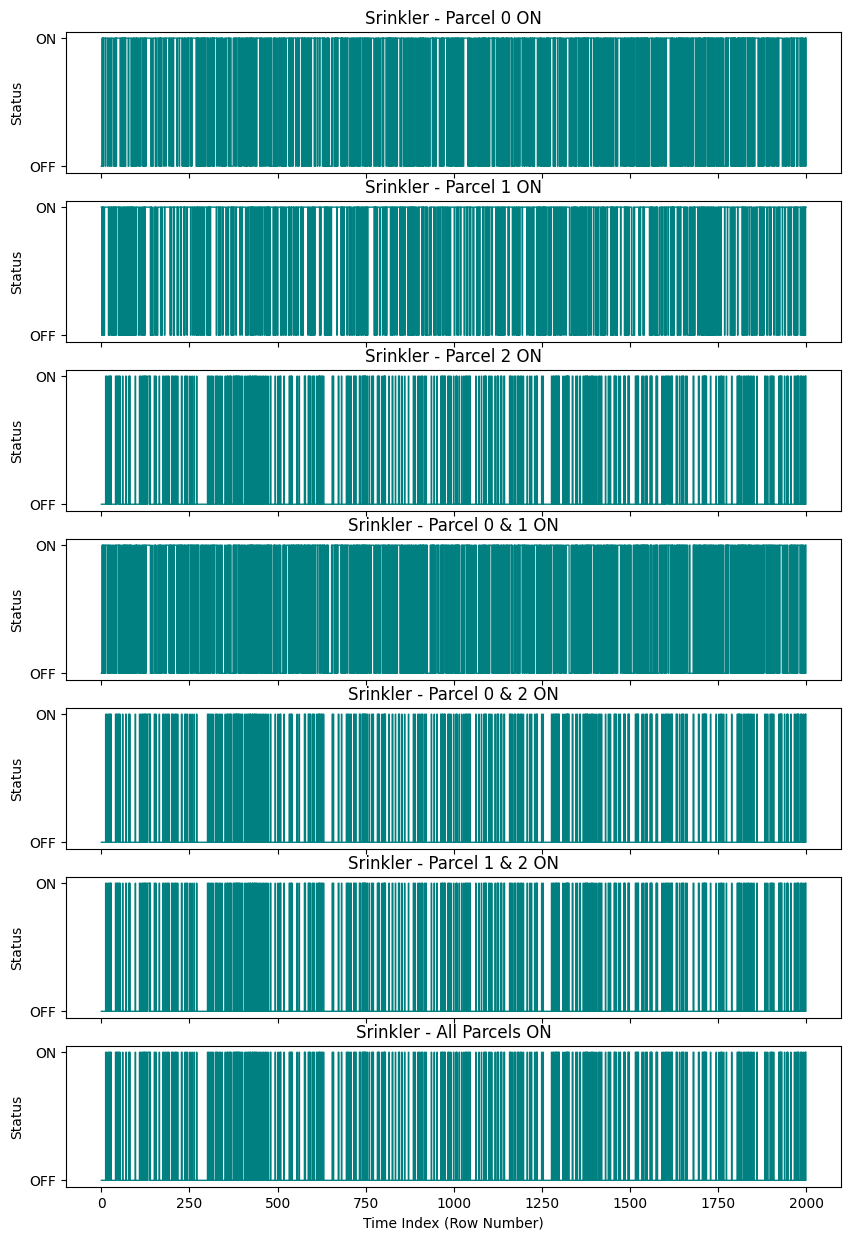

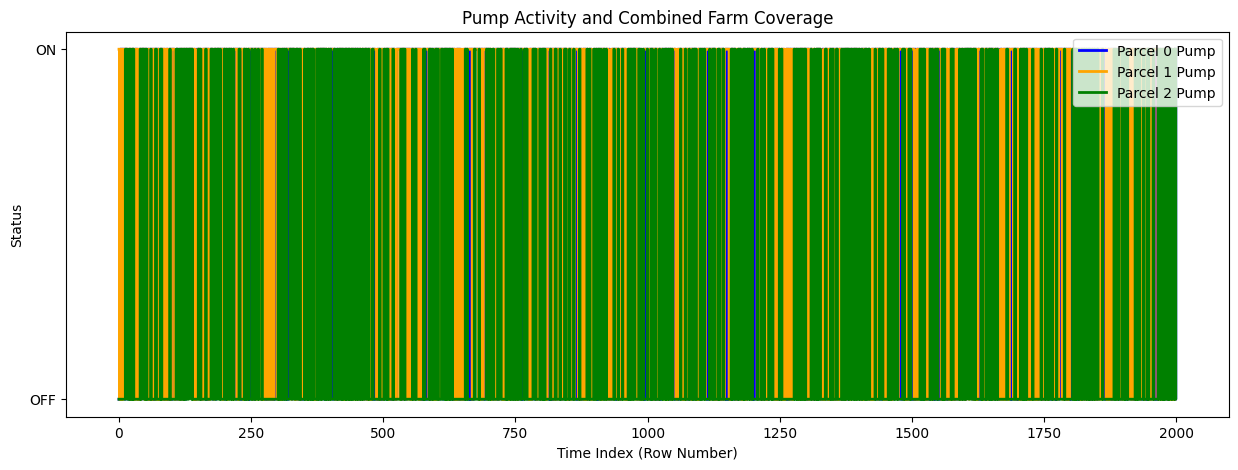

['Farm_Irrigation_System.pkl']

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
import joblib

df = pd.read_csv("irrigation_machine.csv")

print("Dataset preview")

print(df.head())
print(df.info())
print(df.columns)

df = df.drop('Unnamed: 0',axis=1)
print(df.describe())

X = df.iloc[:, 0:20]
y = df.iloc[:, 20:]

print(X.sample(10))
print(y.sample(10))

print(X.shape, y.shape)
print(X.info())
print(y.info())

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#4.Train classifier

rf = RandomForestClassifier(n_estimators=200,max_depth=10, min_samples_split=4, min_samples_leaf=2, max_features='sqrt', random_state=42)
model = MultiOutputClassifier(rf)
model.fit(X_train, y_train)

#5. Evaluate model

y_pred=model.predict(X_test)
print("Classification Report: ")
print(classification_report(y_test, y_pred, target_names=y.columns))

print(df[['parcel_0','parcel_1','parcel_2']].sum())

conditions = {
    "Parcel 0 ON": df['parcel_0'], "Parcel 1 ON": df['parcel_1'], "Parcel 2 ON": df['parcel_2'], "Parcel 0 & 1 ON": df['parcel_0'] & df['parcel_1'],
    "Parcel 0 & 2 ON": df['parcel_0'] & df['parcel_2'], "Parcel 1 & 2 ON": df['parcel_1'] & df['parcel_2'], "All Parcels ON" : df['parcel_0'] & df['parcel_1'] & df['parcel_2'],
}

fig,axs = plt.subplots(nrows=len(conditions), figsize=(10,15), sharex=True)
for ax, (title,condition) in zip(axs,conditions.items()):
    ax.step(df.index, condition.astype(int), where='post', linewidth=1, color='teal')
    ax.set_title(f"Srinkler - {title}")
    ax.set_ylabel("Status")
    ax.set_yticks([0,1])
    ax.set_yticklabels(['OFF','ON'])

axs[-1].set_xlabel("Time Index (Row Number)")

plt.show()

any_pump_on = (df['parcel_0']==1) | (df['parcel_1']==1) | (df['parcel_2']==1)
plt.figure(figsize=(15,5))
plt.step(df.index, df['parcel_0'], where='post', linewidth=2, label='Parcel 0 Pump', color='blue')
plt.step(df.index, df['parcel_1'], where='post', linewidth=2, label='Parcel 1 Pump', color='orange')
plt.step(df.index, df['parcel_2'], where='post', linewidth=2, label='Parcel 2 Pump', color='green')
plt.title("Pump Activity and Combined Farm Coverage")
plt.xlabel("Time Index (Row Number)")
plt.ylabel("Status")
plt.yticks([0,1],['OFF','ON'])
plt.legend(loc='upper right')
plt.show()

joblib.dump(model, "Farm_Irrigation_System.pkl")